In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [5]:
df = pd.read_csv('heart.csv')

In [6]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

In [11]:
os.makedirs('figures', exist_ok=True)
os.makedirs('excel_files', exist_ok=True)

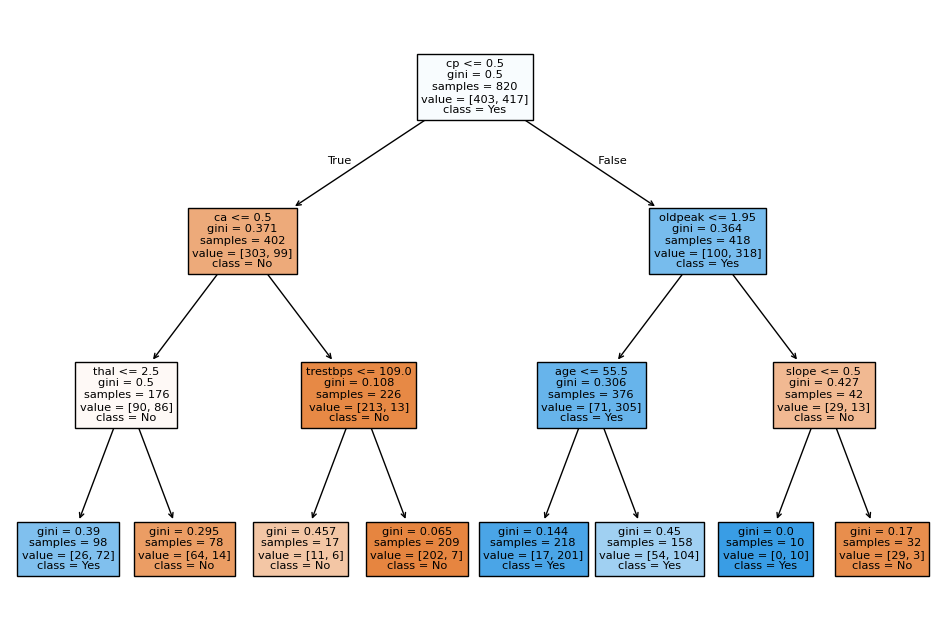

In [10]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.savefig('figures/heart_tree.png')
plt.show()

In [12]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
with pd.ExcelWriter('excel_files/heart_importance.xlsx') as writer:
    importances.to_excel(writer, sheet_name='Features')
    df.corr().to_excel(writer, sheet_name='Correlations')